In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

#데이터 불러오기
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_captita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)

#데이터 준비
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

#데이터  시각화
country_stats.plt

# 이하 생략

# 데이터 분석 -> 모델 선택 -> 모델 훈련 -> 모델 적용 및 예측


FileNotFoundError: [Errno 2] No such file or directory: 'oecd_bli_2015.csv'

주요 도전 과제
1. 충분하지 않은 양의 데이터
2. 대표성 없는 훈련 데이터(샘플링 잡음, 샘플링 편향)
3. 낮은 품질의 데이터(이상치) - 정제에 시간 많이 씀
4. 관련 없는 특성(선택, 추출)
5. 과대적합 - 일반성 떨어짐(잡음 양에 비해 모델이 복잡할때) -> 규제(자유도)
6. 과소 적합 - 모델 파라미터 더 많게, 좋은 특성주기, 제약 줄이기



In [ ]:
# 하이퍼파라미터 선택 하는 방법 = 모델 선택
#모델 선택 - 검증(모델 평가위함 - 모델선택용) - 교차 검증(여러 검증세트의 평균)
#훈련 개발 세트 - 검증세트에서 나쁜 성능을 낸다면= 데이터 불일치 (전처리로 해결)


2.2 큰그림보기

In [ ]:
#프로젝트 체크리스트 준비하는 것이 좋응

In [ ]:
'''
중간 주택 가격 예측

>문제 정의

-비즈니스의 목적이 무엇인가?
-> 어떻게 해서 이익을 얻을 것인가
= 알고리즘, 모델평가 성능지표, 튜닝에 필요한 노력 정도를 결정한다.
뒤따르는 시스템이 해당 지역에 투자할 가치를 결정

데이터 처리 컴포넌트 연속 되있는거 = 파이프라인
비동기적 동작, 각 컴포넌트는 많은 데이터 추출 및 처리하고 그 결과를 다른 데이터 저장소로 보냄
각각 완전히 독립적
각 팀이 집중할 수 있음 => 하나 다운되도, 평시처럼 사용가능= 시스템 견고해짐

-현재 솔루션은 어떻게 구성되나
-> 수동 추정, 복잡한 규칙 이용, 추정치 20퍼나 벗어남
구역의 데이터 기반으로 중간 주택 가격을 예측하는 모델을 훈련시키는 쪽이 유용하다
판단

설계 준비 완료

학습 종류는? 분류 or 회귀? 배치 or 온라인
!) 내 생각에는 지도학습에 회귀, 배치로 해야할 것 같다.
정답: 레이블된 훈련샘플 = 전형적인 지도학습, 값 예측이니 회귀(다중회귀 - 사용할 특성이 여러개),
각 구역마다 하나의 값을 예측이므로 단변량 회귀(여러개면 다변량 회귀)

빠른 데이터 적용 필요없고, 데이터가 메모리에 다들어갈정도로 작으므로 일반 배치


>성능 지표 선택
회귀 전형적 성능 지표 = 평균 제곱근 오차(RMSE) (경우에 따라 다른 함수 사용 - MAE)
 제곱과 절댓값의 차이
 둘다 타깃과 예측값의 벡터사이의 거리르 재는 방법
 norm || . ||_k = (| |^k + ... + | |^k)^(1/k)
 
>가정검사
가정 나열하고, 검사해보는 것이 좋음
심각한 문제 일찍 발견 할수도 있음
가정: 구역의 가격-> 모델-


'''

2.3 데이터 다운로드

In [11]:
import os
import tarfile # tar.gz
import urllib # connect to url

DOWNLOAD_ROOT = 'https:// raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall.open(path=housing_path)
    housing_tgz.close()
    

In [12]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [13]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


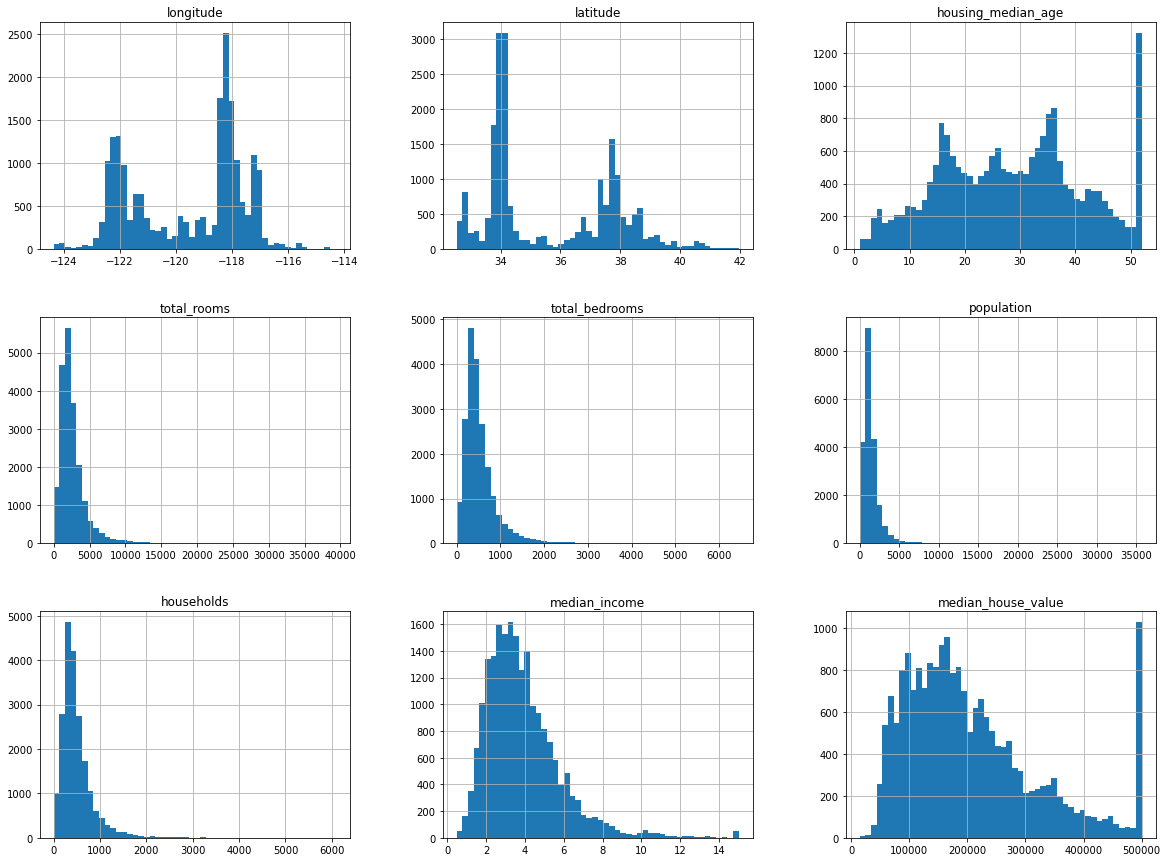

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15)) #샘플 값 분포도
plt.show()

In [18]:
#중간소득 스케일이 너무 작음
# 최소 최대 한정되어서 한쪽이 심하게 높아짐(클라이언트 팀과 함께 검토하는 것이 좋음)
# 해결방법: 1. 한곗값의 구역에 대한 정확한 레이블 구하기, 2. 훈련세트에서 이런 구역을 제거
# 특성들의 스케일이 서로 많ㅇ이 다름 (스케일링 필수)
#꼬리가 두껍다.

In [19]:
#2.3.4 테스트 세트 만들기(데이터 스누핑 편향 제거)
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)


16512

In [21]:
len(test_set)

4128

In [22]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier))&0xffffffff < test_ratio *2 **32

In [23]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [24]:
housing_with_id = housing.reset_index() # 인덱스를 고유식별자로 이용하기 위함(인덱스 초기화)

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


In [25]:
housing_with_id["id"] = housing['longitude'] * 1000 + housing['latitude'] #식별 아이디 임의 생성
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id") # 식별 아이디 만들어서 제공 


In [26]:
#데이터셋 여러개 분할(인덱스기반) , random_state 매개변수 설정 가능
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [28]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.,1.5, 3.0, 4.5, 6. ,np.inf], labels=[1,2,3,4,5])


<AxesSubplot:>

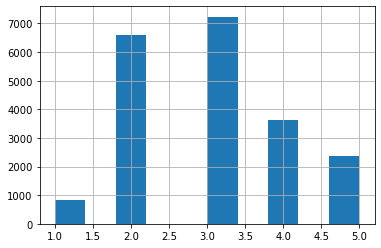

In [39]:
housing["income_cat"].hist()


In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
#계층적 샘플링: 순수 무작위는 샘플링 편향 생길수 있어서, 계층별로 나누어 계수 비율만큼 샘플링
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [42]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [43]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True) #inplace 적용

2.4 데이터 이해를 위한 탐색과 시각화


In [44]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

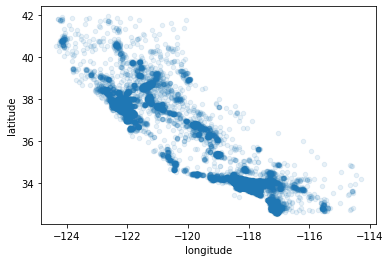

In [48]:
#2.4.1 지리적 데이터 시각화
housing.plot(kind='scatter', x='longitude', y='latitude',alpha=0.1)

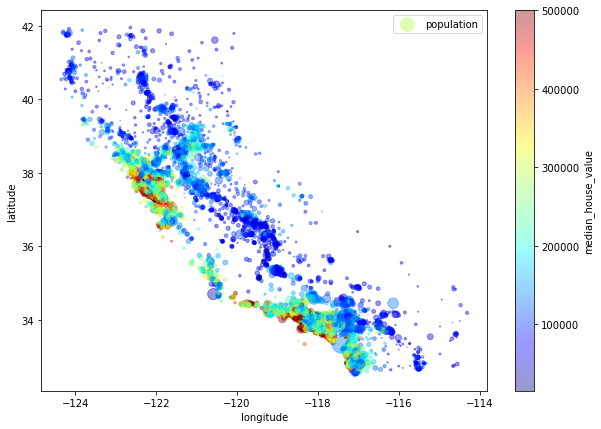

In [49]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()
#s : 크기=인구, c: 색깔=가격, cmap: 범위 색깔
#해안가 근접성 특성이 유용할수 도 있지만, 캘리포니아는 그리높지 않아서 간단히 규칙 적용 어렵다.